In [75]:
# basic stuff
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# torch stuff
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu

## Data

In [29]:
# ignore first row, all nans
# ignore first column, target value (target meaning target on screen) not needed
trialdata16 = np.genfromtxt('trialdata16.csv', delimiter = ',')[1:][:,1:]
trialdata17 = np.genfromtxt('trialdata17.csv', delimiter = ',')[1:][:,1:]
trialdata18 = np.genfromtxt('trialdata18.csv', delimiter = ',')[1:][:,1:]
trialdata19 = np.genfromtxt('trialdata19.csv', delimiter = ',')[1:][:,1:]

In [48]:
timestamps_list16.index(max(timestamps_list16))

43

In [43]:
trialdata16.shape

(160, 65132)

In [52]:
max(timestamps_list16)

857

In [56]:
trial43 = trialdata16[timestamps_list16.index(max(timestamps_list16))]
trial43.shape

(65132,)

In [57]:
trial43[~np.isnan(trial43)].shape

(65132,)

In [63]:
num_timestamps = max(timestamps_list16)
neural_output_shape = 54
newdata = trial43
gloveinput = new_data[:19*num_timestamps].reshape((19, num_timestamps), order = 'F')
neuraloutput = new_data[19*num_timestamps:(19+neural_output_shape)*num_timestamps].reshape((neural_output_shape, num_timestamps), order = 'F')
cursorposition = new_data[(19+neural_output_shape)*num_timestamps:(19+neural_output_shape+2)*num_timestamps].reshape((2, num_timestamps), order = 'F')
timestamps = new_data[(19+neural_output_shape+2)*num_timestamps:]

ValueError: cannot reshape array of size 4623 into shape (19,857)

In [47]:
trialdata16[0]

array([145., 135., 139., ...,  nan,  nan,  nan])

In [46]:
trialdata17

array([[141.       , 125.       , 141.       , ...,         nan,
                nan,         nan],
       [144.       , 128.       , 143.       , ...,         nan,
                nan,         nan],
       [147.       , 127.       , 140.       , ...,         nan,
                nan,         nan],
       ...,
       [148.       , 118.       , 138.       , ..., 659.9807223,
        660.0164068, 660.5838318],
       [149.       , 130.       , 152.       , ...,         nan,
                nan,         nan],
       [149.       , 121.       , 134.       , ...,         nan,
                nan,         nan]])

In [45]:
trialdata18

array([[137.       , 132.       , 144.       , ...,         nan,
                nan,         nan],
       [143.       , 136.       , 142.       , ...,  26.0937743,
         26.1437471,  26.6890667],
       [139.       , 140.       , 150.       , ...,         nan,
                nan,         nan],
       ...,
       [141.       , 104.       ,  75.       , ...,         nan,
                nan,         nan],
       [151.       , 129.       , 137.       , ...,         nan,
                nan,         nan],
       [158.       , 114.       , 143.       , ...,         nan,
                nan,         nan]])

In [44]:
trialdata19

array([[138., 123., 147., ...,  nan,  nan,  nan],
       [142., 125., 147., ...,  nan,  nan,  nan],
       [141., 129., 148., ...,  nan,  nan,  nan],
       ...,
       [165., 117., 140., ...,  nan,  nan,  nan],
       [153., 101.,  90., ...,  nan,  nan,  nan],
       [154., 122., 137., ...,  nan,  nan,  nan]])

In [30]:
trialdata16.shape,trialdata17.shape,trialdata18.shape,trialdata19.shape

((160, 65132), (160, 62811), (160, 36582), (160, 25350))

In [31]:
#80 total trials - cursor goes from center to target, then back to center
#center to target is one row, target back to center is another row
#thus 80*2 = 160 total rows
trialdata18.shape

(160, 36582)

In [32]:
trialdata18[1]

array([143.       , 136.       , 142.       , ...,  26.0937743,
        26.1437471,  26.6890667])

In [33]:
# number of timestamps for each trial; 160 trials
# timestamps obtained by copying and pasting size of timestamps - not sure how to extract from MatlabOpaque object...
timestamps_list16 = [72,47,81,52,73,46,69,116,102,52,55,60,58,49,112,42,61,37,64,58,47,53,55,46,42,40,76,35,60,52,53,49,51,51,57,48,138,35,77,70,87,46,53,857,57,37,67,37,48,43,48,368,135,44,61,40,44,45,54,46,45,47,54,69,201,67,64,40,55,65,49,44,92,62,51,37,51,46,38,41,57,46,72,65,87,56,69,50,66,39,115,70,57,71,60,40,67,115,96,123,45,40,49,40,193,154,56,67,49,48,137,53,79,59,93,43,53,43,71,74,50,39,80,69,42,39,59,237,56,50,39,42,56,45,51,41,37,52,78,25,130,71,66,47,68,71,72,56,60,63,70,58,62,116,51,101,58,60,48,47]
timestamps_list17 = [61,103,51,131,60,84,46,142,122,37,62,80,41,45,55,52,52,39,135,41,198,56,71,78,52,172,51,52,180,43,168,73,44,40,51,63,51,37,74,55,52,35,57,59,48,38,51,53,60,40,52,265,52,53,68,41,49,60,53,46,53,33,43,50,51,36,72,28,50,40,50,48,62,45,46,58,58,31,54,110,69,88,44,43,56,80,52,40,46,49,44,35,61,48,67,39,65,27,54,50,190,139,74,39,53,52,68,43,47,117,91,36,71,49,57,119,65,94,56,41,42,46,55,205,99,22,60,34,57,47,111,42,58,53,185,454,50,37,67,41,68,33,33,62,56,44,54,42,60,49,55,36,50,42,39,57,182,997,50,51]
timestamps_list18 = [113,546,140,114,68,176,24,188,104,94,114,65,123,48,113,80,98,119,105,79,70,93,73,54,68,94,93,100,108,37,85,110,67,43,140,57,104,109,97,158,59,94,51,64,78,32,91,40,62,158,46,63,71,56,86,75,68,63,106,56,43,89,53,101,126,63,67,129,63,83,81,75,71,50,36,80,115,45,71,56,46,58,39,89,35,102,86,75,27,96,49,99,106,84,62,68,115,54,76,84,66,54,101,53,80,56,49,46,62,81,41,48,42,86,43,67,95,42,82,118,86,99,36,76,66,68,31,117,47,61,39,55,48,59,93,58,52,54,51,30,185,64,72,62,85,85,93,63,66,40,54,60,35,82,58,36,42,70,59,69]
timestamps_list19 = [61,236,63,67,68,71,105,105,62,62,77,34,67,60,68,48,66,155,78,43,104,120,82,310,71,53,61,53,71,98,64,93,83,36,69,37,49,55,42,47,71,53,109,74,56,507,67,32,130,60,46,45,63,41,115,185,47,253,110,52,96,42,191,137,48,50,56,52,193,165,88,58,33,216,31,65,56,39,71,59,190,89,57,64,85,56,110,65,65,82,82,34,52,90,86,61,56,73,38,85,83,50,53,137,38,49,48,54,101,44,181,46,78,46,52,87,57,108,185,26,46,112,63,54,130,37,115,126,57,76,56,129,65,80,55,64,101,36,36,45,162,55,74,38,185,110,59,155,35,54,88,58,42,71,63,42,175,62,74,68]
# shape of glove position array, neural output array, cursor position array, timestamp array
shapes_list = [19, 45, 2, 1]

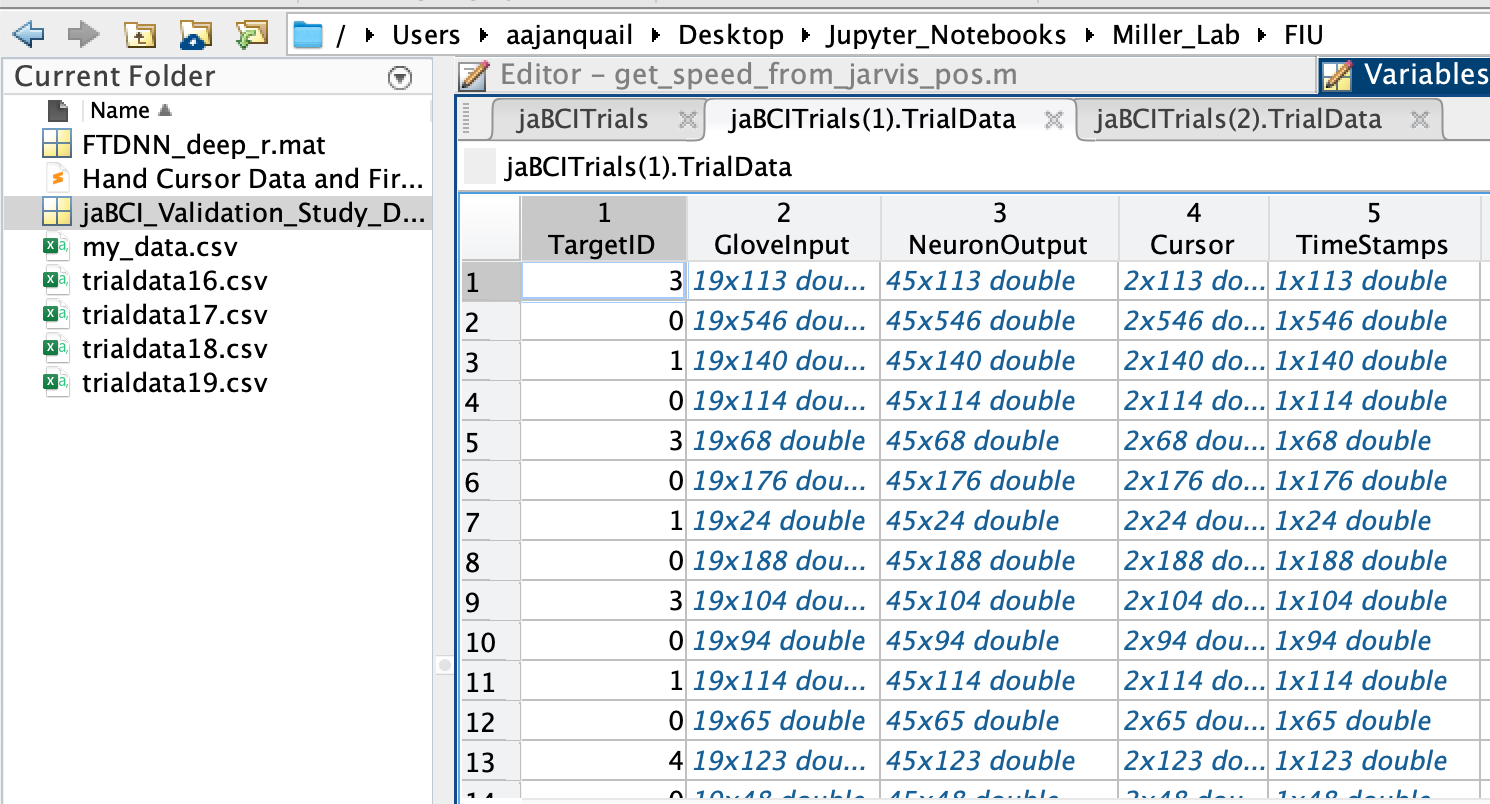

In [72]:
trialdata16.shape

(160, 65132)

In [74]:
trials = []
gloveinputs_list = []
neuraloutputs_list = []
cursorpositions_list = []
timestamps_list = []
for trial, num_timestamps in zip(trialdata16, timestamps_list16):
    new_data = trial[~np.isnan(trial)]
    print(new_data.shape)
    print((19+54+2+1)*num_timestamps)
    
    gloveinput = new_data[:19*num_timestamps].reshape((19, num_timestamps), order = 'F')
    neuraloutput = new_data[19*num_timestamps:(19+54)*num_timestamps].reshape((54, num_timestamps), order = 'F')
    cursorposition = new_data[(19+54)*num_timestamps:(19+54+2)*num_timestamps].reshape((2, num_timestamps), order = 'F')
    timestamps = new_data[(19+54+2)*num_timestamps:]
    
    gloveinputs_list.append(gloveinput)
    neuraloutputs_list.append(neuraloutput)
    cursorpositions_list.append(cursorposition)
    timestamps_list.append(timestamps)
    
    trials.append([gloveinput, neuraloutput, cursorposition, timestamps])

(5472,)
5472
(3572,)
3572
(6156,)
6156
(3952,)
3952
(5548,)
5548
(3496,)
3496
(5244,)
5244
(8816,)
8816
(7752,)
7752
(3952,)
3952
(4180,)
4180
(4560,)
4560
(4408,)
4408
(3724,)
3724
(8512,)
8512
(3192,)
3192
(4636,)
4636
(2812,)
2812
(4864,)
4864
(4408,)
4408
(3572,)
3572
(4028,)
4028
(4180,)
4180
(3496,)
3496
(3192,)
3192
(3040,)
3040
(5776,)
5776
(2660,)
2660
(4560,)
4560
(3952,)
3952
(4028,)
4028
(3724,)
3724
(3876,)
3876
(3876,)
3876
(4332,)
4332
(3648,)
3648
(10488,)
10488
(2660,)
2660
(5852,)
5852
(5320,)
5320
(6612,)
6612
(3496,)
3496
(4028,)
4028
(65132,)
65132
(4332,)
4332
(2812,)
2812
(5092,)
5092
(2812,)
2812
(3648,)
3648
(3268,)
3268
(3648,)
3648
(27968,)
27968
(10260,)
10260
(3344,)
3344
(4636,)
4636
(3040,)
3040
(3344,)
3344
(3420,)
3420
(4104,)
4104
(3496,)
3496
(3420,)
3420
(3572,)
3572
(4104,)
4104
(5244,)
5244
(15276,)
15276
(5092,)
5092
(4864,)
4864
(3040,)
3040
(4180,)
4180
(4940,)
4940
(3724,)
3724
(3344,)
3344
(6992,)
6992
(4712,)
4712
(3876,)
3876
(2812,)
2812
(3

In [65]:
# trials 
len(trials), len(trials[0])

(160, 4)

In [66]:
len(gloveinputs_list)

160

In [67]:
gloveinputs_list[0].shape

(19, 72)

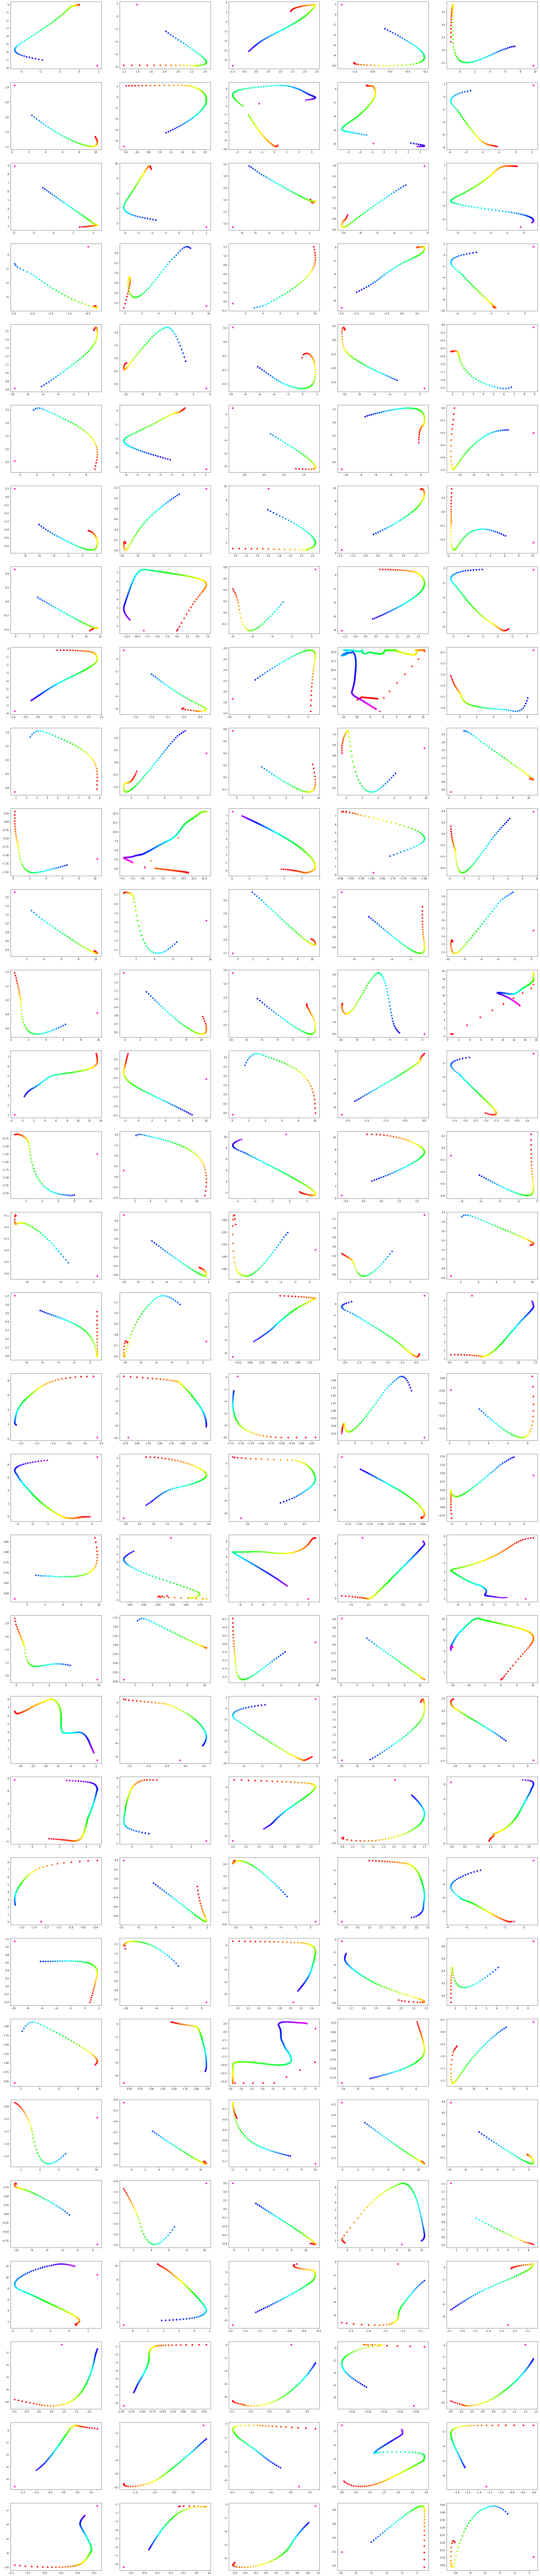

In [76]:
fig, ax = plt.subplots(nrows = 32, ncols = 5)
fig.set_size_inches(40, 200)

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
#         ax[i][j].set_xlim(-16,16)
#         ax[i][j].set_ylim(-16,16)
        ax[i][j].scatter(trials[i*5+j][2][0], trials[i*5+j][2][1], c=trials[i*5+j][3], cmap='gist_rainbow')

plt.show()

In [114]:
trials[0][2][0]

array([-0.005439, 0.004441, -0.015926, 0.012945, -0.031099, 0.025168,
       -0.050622, 0.040795, -0.074182, 0.059535, -0.101490, 0.081126,
       -0.132276, 0.105324, -0.166292, 0.131908, -0.203305, 0.160675,
       -0.243100, 0.191441, -0.285478, 0.224034, -0.330206, 0.257386,
       -0.377066, 0.292105, -0.425905, 0.328074, -0.476581, 0.365188,
       -0.528964, 0.403348, -0.582930, 0.442465, -0.638366, 0.482459,
       -0.695166, 0.523254, -0.753234, 0.564782, -0.812402, 0.607342,
       -0.875039, 0.650089, -0.941566, 0.695210, -1.016162, 0.740697,
       -1.103465, 0.785043, -1.205793, 0.827699, -1.323075, 0.868810,
       -1.455412, 0.907416, -1.605677, 0.941031, -1.774020, 0.968584,
       -1.959322, 0.988350, -2.162876, 1.000794, -2.383838, 1.004167,
       -2.621759, 0.999017, -2.876447, 0.985329, -3.147048, 0.962759,
       -3.433081, 0.931402, -3.731902, 0.891978, -4.042667, 0.844966,
       -4.365002, 0.791644, -4.698439, 0.731327, -5.042192, 0.664594,
       -5.395407, 0.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, mode):
        self.gloveinputs_list = gloveinputs_list
        self.neuraloutputs_list = neuraloutputs_list

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        gloveinput = torch.from_numpy(self.gloveinputs_list[idx])
        neuraloutput = torch.from_numpy(self.neuraloutputs_list[idx])
        
        return gloveinput, neuraloutput

In [ ]:
train_dataset = Subset(dataset, np.arange(4096)[:2458])
val_dataset = Subset(dataset, np.arange(4096)[2458:3277])
test_dataset = Subset(dataset, np.arange(4096)[3277:])

In [18]:
mat = scipy.io.loadmat('jaBCI_Validation_Study_Data.mat')

In [19]:
mat['jaBCITrials']

array([[(array(['MA01'], dtype='<U4'), array([[18]], dtype=uint8), array([[138],
               [121],
               [147],
               [ 63],
               [152],
               [168],
               [ 46],
               [169],
               [169],
               [121],
               [175],
               [170],
               [175],
               [143],
               [138],
               [173],
               [170],
               [132],
               [141]], dtype=uint8), array(['22-Dec-2020 15:16:09'], dtype='<U20'), MatlabOpaque([(b'', b'MCOS', b'table', array([[3707764736],
                             [         2],
                             [         1],
                             [         1],
                             [         1],
                             [         1]], dtype=uint32))         ],
                     dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]))                                                             ,
        (array

mat['jaBCITrials'] is an array with 4 entries, each entry is a tuple with 5 entries

In [25]:
mat['jaBCITrials'][0][0][4]

MatlabOpaque([(b'', b'MCOS', b'table', array([[3707764736],
                     [         2],
                     [         1],
                     [         1],
                     [         1],
                     [         1]], dtype=uint32))         ],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

## Network

In [60]:
network = scipy.io.loadmat('FTDNN_deep_r.mat')

In [62]:
network.keys()

dict_keys(['__header__', '__version__', '__globals__', 'net'])

In [63]:
network['__header__'], network['__version__'], network['__globals__']

(b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Oct  7 14:40:39 2020',
 '1.0',
 [])

In [66]:
network['net'].shape

(1, 22)

In [80]:
len(network['net'][0][0][0][0])

41

In [71]:
type(network['net'][0][0])

scipy.io.matlab._mio5_params.MatlabObject